In [1]:
#importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

<p>Importing the data and cleaning the data</p>

In [2]:
data = pd.read_csv('./Data/data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data = data.set_index('EmployeeNumber')
data.loc[data['Attrition'] == 'Yes', 'Attrition'] = 1
data.loc[data['Attrition'] == 'No', 'Attrition'] = 0
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


<p>Dropping columns that do not add value and creating dummy variables.</p>

In [4]:
data = data.drop(['EmployeeCount', 'Over18'],axis=1)
df = pd.get_dummies(data, columns=['BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime'])

In [5]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
2,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
4,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
5,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
7,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [6]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<p>Quantifying the severity of multicollinearity by monitoring the variance inflation factors for each variable and removing the variables that are highly correlated with other variables.</p>

In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [9]:
final_iv, IV = data_vars(X_train, y_train)

In [10]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]

In [11]:
def iterate_vif(df, vif_threshold=3, max_vif=4):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)
X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing Gender_Female with VIF of inf
Iteration # 2


C:\Users\Boris-Tsao\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing MaritalStatus_Divorced with VIF of inf
Iteration # 3
Removing OverTime_No with VIF of 90.100000
Iteration # 4
Removing JobLevel with VIF of 63.400000
Iteration # 5
Removing Age with VIF of 30.000000
Iteration # 6
Removing MonthlyIncome with VIF of 21.700000
Iteration # 7
Removing Department_Research & Development with VIF of 19.500000
Iteration # 8
Removing JobInvolvement with VIF of 12.500000
Iteration # 9
Removing YearsAtCompany with VIF of 10.100000
Iteration # 10
Removing TotalWorkingYears with VIF of 6.500000
Iteration # 11
Removing JobSatisfaction with VIF of 6.300000
Iteration # 12
Removing EnvironmentSatisfaction with VIF of 6.000000
Iteration # 13
Removing YearsInCurrentRole with VIF of 5.500000
Iteration # 14
Removing EducationField_Life Sciences with VIF of 5.000000
Iteration # 15
Removing DailyRate with VIF of 4.100000
Iteration # 16
Removing YearsWithCurrManager with VIF of 3.100000
Iteration # 17
Complete


In [12]:
X_train=final_df

In [13]:
X_test=X_test[X_train.columns]

In [14]:
# Import model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve

# Define model evaluation method
def model_test(model, ytest, y_predict):
    print('The accuracy of {} model is: {:.2f}'.format(model, accuracy_score(ytest, y_predict)))
    print('The confusion matrix is:\n{}'.format(confusion_matrix(ytest, y_predict)))
    print('The auc score is: {:.2f}'.format(roc_auc_score(ytest, y_predict)))
    print('The F1-score is: {:.2f}'.format(f1_score(ytest, y_predict)))

# Define auc plotting method
def plot_roc(model, ytest, y_predict, y_predict_prob):
    fpr, tpr, _ = roc_curve(ytest, y_predict_prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label = 'AUC score by {}: {:.2f}'.format(model, roc_auc_score(ytest, y_predict)))
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'best')
    plt.xlim(0,1)
    plt.ylim(0,1)

<h3>Logistic Regression</h3>

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg_predict_prob = log_reg.predict_proba(X_test)[:,1]

In [16]:
model_test('Logistic Regression', y_test, log_reg_predict)

The accuracy of Logistic Regression model is: 0.87
The confusion matrix is:
[[371   9]
 [ 49  12]]
The auc score is: 0.59
The F1-score is: 0.29


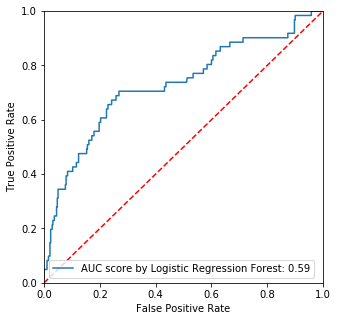

In [17]:
plot_roc('Logistic Regression Forest',y_test, log_reg_predict,log_reg_predict_prob)

<p>Trying out a random forest classifier</p>

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, random_state=42)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_predict_prob = rf.predict_proba(X_test)[:,1]

In [19]:
model_test('Random Forest', y_test, rf_predict)

The accuracy of Random Forest model is: 0.85
The confusion matrix is:
[[363  17]
 [ 51  10]]
The auc score is: 0.56
The F1-score is: 0.23


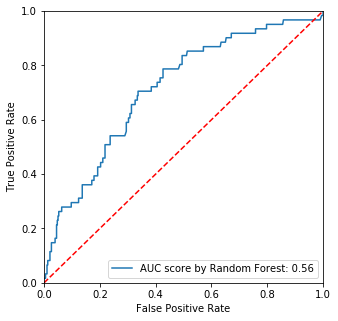

In [20]:
plot_roc('Random Forest',y_test, rf_predict,rf_predict_prob)

In [21]:
top_features = dict(zip(list(final_df.columns), list(rf.feature_importances_)))

In [22]:
top_features

{'BusinessTravel_Non-Travel': 0.017694313755866064,
 'BusinessTravel_Travel_Frequently': 0.04226385671133963,
 'Department_Sales': 0.03104291038504666,
 'DistanceFromHome': 0.24179793147534806,
 'EducationField_Human Resources': 0.01263639309122094,
 'EducationField_Marketing': 0.02187420514499652,
 'EducationField_Medical': 0.04555678218730939,
 'EducationField_Technical Degree': 0.02991609865320686,
 'Gender_Male': 0.052784297256022746,
 'JobRole_Healthcare Representative': 0.01613143825312199,
 'JobRole_Laboratory Technician': 0.04152417674689173,
 'JobRole_Manager': 0.013089882222906253,
 'JobRole_Manufacturing Director': 0.02122801310776418,
 'JobRole_Research Director': 0.011769602026656467,
 'JobRole_Sales Representative': 0.033730654905945644,
 'MaritalStatus_Married': 0.030078465279606812,
 'MaritalStatus_Single': 0.037067105482353604,
 'OverTime_Yes': 0.08817276812820139,
 'StockOptionLevel': 0.07418706257015993,
 'YearsSinceLastPromotion': 0.13745404261603483}

<h3>Support Vector Classifier</h3>

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [24]:
# Scale the data
scale = StandardScaler()
scale.fit(X_train)
X_train_transform = scale.transform(X_train)
X_test_transform = scale.transform(X_test)

In [25]:
svc = SVC()
svc.fit(X_train_transform, y_train)

svc_predict = svc.predict(X_test_transform)

In [26]:
model_test('SVC', y_test, svc_predict)

The accuracy of SVC model is: 0.87
The confusion matrix is:
[[375   5]
 [ 53   8]]
The auc score is: 0.56
The F1-score is: 0.22


<h3> Gradient Boosting Classifier </h3>

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)
gb_predict_prob = gb.predict_proba(X_test)[:,1]

In [29]:
model_test('Gradient Boosting', y_test, gb_predict)

The accuracy of Gradient Boosting model is: 0.85
The confusion matrix is:
[[366  14]
 [ 51  10]]
The auc score is: 0.56
The F1-score is: 0.24


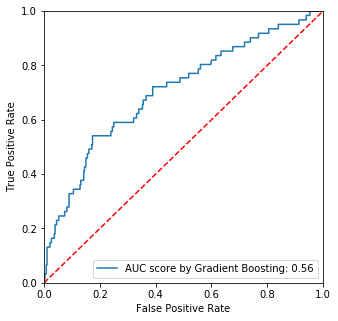

In [30]:
plot_roc('Gradient Boosting', y_test, gb_predict, gb_predict_prob)

In [31]:
model_test('Threshold tuned gradient boosting',y_test, (gb_predict_prob>0.4).astype(int))

The accuracy of Threshold tuned gradient boosting model is: 0.85
The confusion matrix is:
[[358  22]
 [ 46  15]]
The auc score is: 0.59
The F1-score is: 0.31


<h3> Neuron Network </h3>

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500)
mlp.fit(X_train_transform, y_train)

mlp_predict = mlp.predict(X_test_transform)
mlp_predict_prob = mlp.predict_proba(X_test_transform)[:,1]

In [33]:
model_test('Neuron Network', y_test, mlp_predict)

The accuracy of Neuron Network model is: 0.80
The confusion matrix is:
[[334  46]
 [ 43  18]]
The auc score is: 0.59
The F1-score is: 0.29


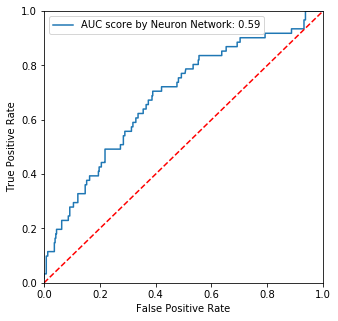

In [34]:
plot_roc('Neuron Network', y_test, mlp_predict, mlp_predict_prob)

Text(0,0.5,'True Positive Rate')

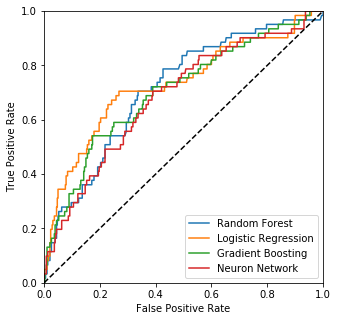

In [35]:
# Comparison of ROC curve for four types of models, it is indicated gradient boosting and neuron network provide the highest AUC score
plt.figure(figsize=(5,5))
for i,j in zip([rf_predict_prob, log_reg_predict_prob, gb_predict_prob, mlp_predict_prob], 
               ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Neuron Network']):
    fpr, tpr, _ = roc_curve(y_test, i)
    plt.plot(fpr, tpr, label = j)
plt.legend(loc = 'best')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [36]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1200 ], 'alpha': 10.0 ** -np.arange(1, 3), 'hidden_layer_sizes':np.arange(10, 12), 'random_state':[1,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [37]:
clf.fit(X_train_transform, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [1000, 1200], 'alpha': array([0.1 , 0.01]), 'hidden_layer_sizes': array([10, 11]), 'random_state': [1, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
clf_predict = clf.predict(X_test_transform)
clf_predict_prob = clf.predict_proba(X_test_transform)[:,1]

In [39]:
model_test('Hyper parameter tuned Neuron Network', y_test, clf_predict)

The accuracy of Hyper parameter tuned Neuron Network model is: 0.79
The confusion matrix is:
[[329  51]
 [ 43  18]]
The auc score is: 0.58
The F1-score is: 0.28


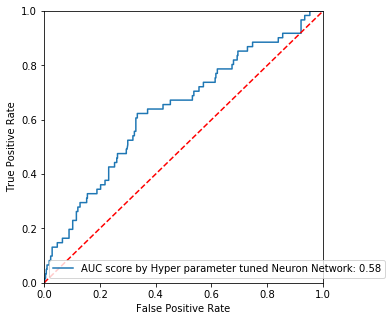

In [40]:
plot_roc('Hyper parameter tuned Neuron Network', y_test, clf_predict, clf_predict_prob)

In [41]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

In [42]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
logreg_cv_predict = logreg_cv.predict(X_test)
logreg_cv_predict_predict_prob = logreg_cv.predict_proba(X_test)[:,1]

In [44]:
model_test('Hyper parameter tuned Neuron Network', y_test, logreg_cv_predict)

The accuracy of Hyper parameter tuned Neuron Network model is: 0.87
The confusion matrix is:
[[371   9]
 [ 49  12]]
The auc score is: 0.59
The F1-score is: 0.29
